In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re
%matplotlib inline

In [28]:
with open('/Users/skylark/Desktop/Misc/Machine Learning (Codes and Data Files)/sentiment labelled sentences/yelp_labelled.txt') as f:
    contents = f.readlines()

In [30]:
contents[:10]

['Wow... Loved this place.\t1\n',
 'Crust is not good.\t0\n',
 'Not tasty and the texture was just nasty.\t0\n',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\n',
 'The selection on the menu was great and so were the prices.\t1\n',
 'Now I am getting angry and I want my damn pho.\t0\n',
 "Honeslty it didn't taste THAT fresh.)\t0\n",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\n',
 'The fries were great too.\t1\n',
 'A great touch.\t1\n']

In [15]:
text = pd.read_csv('/Users/skylark/Desktop/Misc/Machine Learning (Codes and Data Files)/sentiment labelled sentences/yelp_labelled.txt', delimiter="\t", header=None)
text.columns = ['Text', 'Sentiment']

In [16]:
text

,Text,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [18]:
text.Sentiment.value_counts()

1    500
0    500
Name: Sentiment, dtype: int64

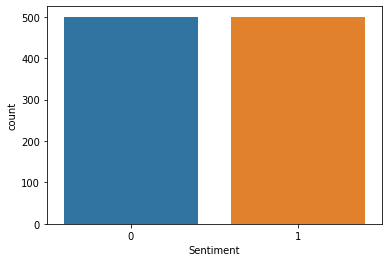

In [19]:
sn.countplot(x='Sentiment', data=text)

In [22]:
text[text.Sentiment==1][:10]

,Text,Sentiment
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
10,Service was very prompt.,1
13,"I tried the Cape Cod ravoli, chicken,with cran...",1
16,Highly recommended.,1
21,"The food, amazing.",1
22,Service is also cute.,1


In [23]:
text[text.Sentiment==0][:10]

,Text,Sentiment
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
11,Would not go back.,0
12,The cashier had no care what so ever on what I...,0
14,I was disgusted because I was pretty sure that...,0
15,I was shocked because no signs indicate cash o...,0
17,Waitress was a little slow in service.,0


In [60]:
("".join(re.findall('[A-Za-z" "]+', contents[1]))).lower()

'crust is not good'

In [61]:
content=[]
for i in range(len(contents)):
    content.append(("".join(re.findall('[A-Za-z" "]+', contents[i]))).lower())

In [63]:
content

['wow loved this place',
 'crust is not good',
 'not tasty and the texture was just nasty',
 'stopped by during the late may bank holiday off rick steve recommendation and loved it',
 'the selection on the menu was great and so were the prices',
 'now i am getting angry and i want my damn pho',
 'honeslty it didnt taste that fresh',
 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer',
 'the fries were great too',
 'a great touch',
 'service was very prompt',
 'would not go back',
 'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced',
 'i tried the cape cod ravoli chickenwith cranberrymmmm',
 'i was disgusted because i was pretty sure that was human hair',
 'i was shocked because no signs indicate cash only',
 'highly recommended',
 'waitress was a little slow in service',
 'this place is not worth your time let alone vegas',
 'did not like at all',
 'the burrittos blah',
 'the 

In [68]:
content = pd.DataFrame(content, columns=['Text'])
content['Sentiment'] = text.Sentiment
content.head(10)

,Text,Sentiment
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
5,now i am getting angry and i want my damn pho,0
6,honeslty it didnt taste that fresh,0
7,the potatoes were like rubber and you could te...,0
8,the fries were great too,1
9,a great touch,1


In [69]:
pd.set_option('max_colwidth', 800)

In [71]:
content[content.Sentiment==1].sample(10)

,Text,Sentiment
656,hands down my favorite italian restaurant,1
521,if you havent gone here go now,1
787,i dont have very many words to say about this place but it does everything pretty well,1
55,loved itfriendly servers great food wonderful and imaginative menu,1
496,the pancake was also really good and pretty large at that,1
52,their chow mein is so good,1
722,the food was great as always compliments to the chef,1
737,try them in the airport to experience some tasty food and speedy friendly service,1
144,nice blanket of moz over top but i feel like this was done to cover up the subpar food,1
295,you get incredibly fresh fish prepared with care,1


In [72]:
content[content.Sentiment==0].sample(10)

,Text,Sentiment
672,as a sushi lover avoid this place by all means,0
835,i paid the bill but did not tip because i felt the server did a terrible job,0
709,i mean really how do you get so famous for your fish and chips when its so terrible,0
893,worst thai ever,0
921,this place is disgusting,0
643,maybe if they werent cold they would have been somewhat edible,0
218,which are small and not worth the price,0
220,the shower area is outside so you can only rinse not take a full shower unless you dont mind being nude for everyone to see,0
376,i took back my money and got outta there,0
82,the turkey and roast beef were bland,0


In [102]:
content.shape

(1000, 2)

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [115]:
cv = CountVectorizer(stop_words='english', max_df=0.8, min_df=3)

In [116]:
count_vector = cv.fit_transform(content.Text)
count_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [117]:
features = cv.get_feature_names()

In [118]:
len(features)

408

In [119]:
cv_df = pd.DataFrame(count_vector.toarray(), columns=features)
cv_df.head()

,absolutely,ago,amazing,ambiance,ambience,anytime,area,arrived,ask,asked,...,wont,worst,worth,wouldnt,wow,wrong,years,youre,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
counts = pd.DataFrame(cv_df.sum(axis=0).sort_values(ascending=False)).reset_index()
counts.columns = ['Feature', 'Count']
counts.head(10)

,Feature,Count
0,food,124
1,place,106
2,good,95
3,service,83
4,great,70
5,like,46
6,time,42
7,really,36
8,just,35
9,best,30


In [121]:
len(counts[counts['Count']<3])

0

In [122]:
counts[counts['Feature']=='zero']

,Feature,Count
170,zero,5


In [110]:
cv1 = CountVectorizer(max_df=0.8, min_df=3)
count_vector1 = cv.fit_transform(content.Text)
count_vector1.toarray()
features1 = cv.get_feature_names()

In [112]:
len(features1)

1831

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
train_x, test_x, train_y, test_y = train_test_split(count_vector, content.Sentiment, test_size=0.2, random_state=42)

In [128]:
train_x

<800x408 sparse matrix of type '<class 'numpy.int64'>'
	with 2575 stored elements in Compressed Sparse Row format>

In [126]:
from sklearn.linear_model import LogisticRegression

In [129]:
mod = LogisticRegression()
mod.fit(train_x.toarray(), train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
coef=pd.DataFrame(mod.coef_).T

In [139]:
coef['Column'] = features

In [141]:
coef.columns = ['Coef', 'Column']

In [143]:
coef.sort_values('Coef', ascending=False)[:10]

,Coef,Column
407,2.934884,zero
406,2.269401,yummy
405,1.816133,youre
404,1.741044,years
403,1.612759,wrong
402,1.552167,wow
401,1.547394,wouldnt
400,1.540722,worth
399,1.538600,worst
398,1.415968,wont


In [144]:
coef.sort_values('Coef')[:10]

,Coef,Column
0,-1.510666,absolutely
1,-1.450411,ago
2,-1.390892,amazing
3,-1.324705,ambiance
4,-1.307740,ambience
5,-1.121871,anytime
6,-1.083406,area
7,-1.073484,arrived
8,-1.065372,ask
9,-1.050369,asked


In [145]:
coef[coef['Coef']<0]

,Coef,Column
0,-1.510666,absolutely
1,-1.450411,ago
2,-1.390892,amazing
3,-1.324705,ambiance
4,-1.307740,ambience
...,...,...
196,-0.021393,location
197,-0.018985,long
198,-0.007677,look
199,-0.000542,lot


In [147]:
pred_y=mod.predict(test_x.toarray())

In [149]:
pred = pd.DataFrame({'actual': test_y, 'predicted': pred_y})
pred[:10]

,actual,predicted
521,1,0
737,1,1
740,1,0
660,1,0
411,1,0
678,1,0
626,0,0
513,1,0
859,0,1
136,1,0


In [161]:
prob = pd.DataFrame(mod.predict_proba(test_x.toarray()))
prob.iloc[:,1:2]

,1
0,0.337927
1,0.556929
2,0.239263
3,0.139696
4,0.222445
...,...
195,0.403068
196,0.221657
197,0.453499
198,0.156691


In [152]:
metrics.confusion_matrix(test_y, pred_y,[1,0])

array([[25, 79],
       [32, 64]])

In [159]:
pred.reset_index(drop=True, inplace=True)

In [162]:
pred['prob'] = prob.iloc[:,1:2]

In [163]:
pred[:10]

,actual,predicted,prob
0,1,0,0.337927
1,1,1,0.556929
2,1,0,0.239263
3,1,0,0.139696
4,1,0,0.222445
5,1,0,0.387415
6,0,0,0.387860
7,1,0,0.396251
8,0,1,0.736280
9,1,0,0.313150


In [164]:
fpr, tpr, threshold = metrics.roc_curve(pred.actual, pred.prob, drop_intermediate=False)

In [174]:
fpr_tpr=pd.DataFrame(fpr, columns=['FPR'])

In [176]:
fpr_tpr['TPR'] = tpr

In [187]:
fpr_tpr['Threshold'] = np.round(threshold, 3)

In [188]:
fpr_tpr['Diff'] = fpr_tpr.TPR - fpr_tpr.FPR

In [189]:
fpr_tpr.sort_values('Diff', ascending=False)

,FPR,TPR,Threshold,Diff
155,0.812500,0.865385,0.239,0.052885
159,0.833333,0.884615,0.222,0.051282
152,0.802083,0.846154,0.244,0.044071
154,0.812500,0.855769,0.239,0.043269
156,0.822917,0.865385,0.238,0.042468
...,...,...,...,...
80,0.489583,0.346154,0.424,-0.143429
88,0.531250,0.384615,0.406,-0.146635
76,0.468750,0.317308,0.436,-0.151442
79,0.489583,0.336538,0.427,-0.153045


In [200]:
pred['pred_new'] = pred.apply(lambda x: 1 if x['prob']>0.239 else 0, axis=1)

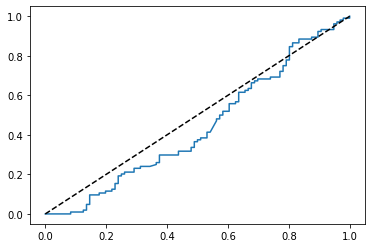

In [216]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')

In [205]:
metrics.confusion_matrix(pred.actual, pred.pred_new, [1,0])

array([[90, 14],
       [78, 18]])

In [206]:
print(metrics.classification_report(pred.actual, pred.pred_new))

              precision    recall  f1-score   support

           0       0.56      0.19      0.28        96
           1       0.54      0.87      0.66       104

    accuracy                           0.54       200
   macro avg       0.55      0.53      0.47       200
weighted avg       0.55      0.54      0.48       200



In [209]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
rdm = RandomForestClassifier(n_estimators=10)

In [211]:
rdm.fit(train_x.toarray(), train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [212]:
pred_y_rdm = rdm.predict(test_x.toarray())

In [214]:
pred_y_rdm

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1])

In [215]:
pred_rdm = pd.DataFrame({'actual':test_y, 'predicted':pred_y_rdm})
pred_rdm.sample(10)

,actual,predicted
439,1,1
948,0,0
636,0,1
209,1,1
810,0,1
902,0,1
184,1,1
865,1,1
346,1,0
174,1,1


In [217]:
prob_rdm = pd.DataFrame(rdm.predict_proba(test_x.toarray()))

In [219]:
prob_rdm.head()

,0,1
0,0.828023,0.171977
1,0.000000,1.000000
2,0.200000,0.800000
3,0.100000,0.900000
4,0.300000,0.700000


In [221]:
pred_rdm.reset_index(drop=True, inplace=True)

In [222]:
pred_rdm['prob'] = prob_rdm.iloc[:,1:2]
pred_rdm.sample(10)

,actual,predicted,prob
120,0,0,0.421914
158,0,0,0.000000
128,1,1,0.721627
45,1,0,0.000000
123,1,1,0.771627
173,0,0,0.473810
127,1,1,0.506070
30,1,0,0.366667
81,1,1,1.000000
115,1,1,1.000000


In [223]:
fpr, tpr, threshold = metrics.roc_curve(pred_rdm.actual, pred_rdm.prob, drop_intermediate=False)

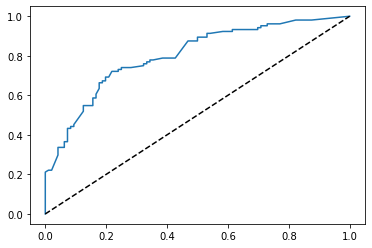

In [224]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')

In [225]:
metrics.roc_auc_score(pred_rdm.actual, pred_rdm.prob)

0.8009314903846154

In [226]:
from sklearn.model_selection import GridSearchCV

In [227]:
tuned = [{'max_depth':[5,10,15,10], 'n_estimators': [10,15,20], 'max_features':['auto', 'sqrt', 0.2], 'criterion':['gini', 'entropy']}]

In [228]:
grid = GridSearchCV(RandomForestClassifier(), tuned, cv=5, scoring='roc_auc')

In [229]:
grid.fit(train_x.toarray(), train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [230]:
grid.best_score_

0.8301851278031723

In [231]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 15}

In [234]:
rdm1 = RandomForestClassifier(criterion= 'entropy',
 max_depth= 15,
 max_features= 'auto',
 n_estimators= 15)

In [235]:
rdm1.fit(train_x.toarray(), train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [237]:
pred_rdm['pred_cv'] = rdm1.predict(test_x.toarray())
pred_rdm

,actual,predicted,prob,pred_cv
0,1,0,0.171977,0
1,1,1,1.000000,1
2,1,1,0.800000,1
3,1,1,0.900000,1
4,1,1,0.700000,1
...,...,...,...,...
195,1,1,0.892857,1
196,1,1,0.892857,1
197,0,1,0.664484,0
198,0,0,0.300000,0


In [239]:
len(rdm1.feature_importances_)

408

In [243]:
feat_imp = pd.DataFrame({'feature':features, 'importance':rdm1.feature_importances_}).sort_values('importance', ascending=False)

In [275]:
feat_imp['cumsum'] = feat_imp.importance.cumsum()*100
feat_imp[feat_imp['cumsum']<=95]

,feature,importance,cumsum
75,delicious,0.089601,8.960133
143,great,0.088389,17.799010
387,wasnt,0.037290,21.528010
20,bad,0.036052,25.133234
110,excellent,0.034757,28.608983
...,...,...,...
234,overpriced,0.001819,94.286592
332,super,0.001814,94.468040
290,salad,0.001812,94.649282
217,mouth,0.001787,94.828017


In [277]:
important_features = list(feat_imp[feat_imp['cumsum']<96].feature)

In [262]:
metrics.confusion_matrix(pred_rdm.actual, pred_rdm.pred_cv, [1,0])

array([[60, 44],
       [ 7, 89]])

In [264]:
print(metrics.classification_report(pred_rdm.actual, pred_rdm.pred_cv))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78        96
           1       0.90      0.58      0.70       104

    accuracy                           0.74       200
   macro avg       0.78      0.75      0.74       200
weighted avg       0.79      0.74      0.74       200



In [265]:
from sklearn.model_selection import cross_val_score

In [268]:
cv = cross_val_score(rdm1, count_vector.toarray(), content.Sentiment, cv=5, scoring='roc_auc')

In [274]:
np.mean(cv)

0.8229

In [278]:
from sklearn.ensemble import AdaBoostClassifier

In [280]:
mod1 = AdaBoostClassifier(LogisticRegression(), n_estimators=50)
mod1.fit(train_x.toarray(), train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [281]:
pred_y_ada = mod1.predict(test_x.toarray())
pred_ada = pd.DataFrame({'actual':test_y, 'predicted':pred_y_ada})
pred_ada.sample(5)

,actual,predicted
363,0,0
583,1,0
644,0,0
947,0,0
749,1,0


In [282]:
prob_ada = pd.DataFrame(mod1.predict_proba(test_x.toarray()))
prob_ada

,0,1
0,0.501229,0.498771
1,0.497622,0.502378
2,0.498922,0.501078
3,0.496342,0.503658
4,0.500233,0.499767
...,...,...
195,0.499071,0.500929
196,0.497946,0.502054
197,0.499654,0.500346
198,0.502896,0.497104


In [284]:
pred_ada.reset_index(drop=True, inplace=True)

In [285]:
pred_ada['prob'] = prob_ada.iloc[:,1:2]

In [294]:
pred_ada.sample(6)

,actual,predicted,prob
78,0,0,0.499157
110,1,0,0.497935
138,1,1,0.503538
0,1,0,0.498771
2,1,1,0.501078
122,0,0,0.496476


In [287]:
fpr, tpr, threshold = metrics.roc_curve(pred_ada.actual, pred_ada.prob, drop_intermediate=False)

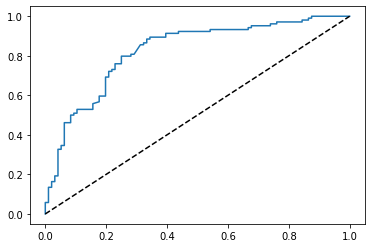

In [288]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')

In [293]:
round(metrics.roc_auc_score(pred_ada.actual, pred_ada.prob),3)

0.824

In [295]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [301]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=3, ngram_range=(1,2))

In [302]:
tfidf_vector = tfidf.fit_transform(content.Text)

In [303]:
feature_tfidf = tfidf.get_feature_names()
len(feature_tfidf)

453

In [304]:
train_x, test_x, train_y, test_y = train_test_split(tfidf_vector, content.Sentiment, test_size=0.2, random_state=42)

In [305]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
mod1_rdm = RandomForestClassifier(criterion='entropy', max_depth=15, max_features='sqrt', n_estimators=20)

grid1 = GridSearchCV(RandomForestClassifier(), tuned, cv=5, scoring='roc_auc')

In [311]:
grid1.fit(train_x.toarray(), train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [312]:
grid1.best_score_

0.8296854781997186

In [314]:
grid1.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 20}

In [317]:
mod1_rdm.fit(train_x.toarray(), train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [318]:
pred_rdm_tf = mod1_rdm.predict(test_x.toarray())
pred_rdm_tf

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1])

In [319]:
pred_rdm1 = pd.DataFrame({'actual': test_y, 'predicted':pred_rdm_tf})
pred_rdm1.sample(10)

,actual,predicted
521,1,0
892,0,0
749,1,0
689,1,1
107,1,0
995,0,0
810,0,0
902,0,0
88,1,0
237,1,0


In [320]:
metrics.confusion_matrix(pred_rdm1.actual, pred_rdm1.predicted, [1,0])

array([[51, 53],
       [12, 84]])